In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import trompy as tp
import csv
from datetime import datetime, timedelta


# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


ctl_color= "gray"
exp_color="deepskyblue"
fig_folder=r"../plots\\"
#READ_METAFILE= pd.read_excel(r"..\FEDXD_METAFILE.xls" ,sheet_name="METAFILE" )

#READ_METAFILE


In [3]:
data= pd.read_csv('../results/2PELLET_MEAL.csv')
data

,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,COUNT,MEAL_SIZE,SNACK_SIZE,NUMBER_OF_MEALS,MEAL_FREQUENCY,NUMBER_OF_SNACKS,SNACK_FREQUENCY,MEALS_HOUR_0,MEALS_HOUR_1,MEALS_HOUR_2,MEALS_HOUR_3,MEALS_HOUR_4,MEALS_HOUR_5,MEALS_HOUR_6,MEALS_HOUR_7,MEALS_HOUR_8,MEALS_HOUR_9,MEALS_HOUR_10,MEALS_HOUR_11,MEALS_HOUR_12,MEALS_HOUR_13,MEALS_HOUR_14,MEALS_HOUR_15,MEALS_HOUR_16,MEALS_HOUR_17,MEALS_HOUR_18,MEALS_HOUR_19,MEALS_HOUR_20,MEALS_HOUR_21,MEALS_HOUR_22,MEALS_HOUR_23
0,FEDXDF1,F,PR,0.0,MIX,210,4.666667,1.0,42,1.932688,14,0.644229,2.0,1.0,0.0,3.0,3.0,1.0,1.0,4.0,0.0,0.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0
1,FEDXDF1,F,PR,0.0,MIX,296,3.271429,1.0,70,1.471112,67,1.408064,7.0,3.0,5.0,0.0,0.0,3.0,2.0,0.0,2.0,1.0,1.0,2.0,4.0,1.0,5.0,4.0,8.0,5.0,5.0,4.0,0.0,0.0,6.0,2.0
2,FEDXDF2,F,PR,0.0,MIX,350,3.387097,1.0,93,4.203179,35,1.581841,2.0,1.0,8.0,11.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,7.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,2.0
3,FEDXDF2,F,PR,0.0,MIX,330,3.011905,1.0,84,1.727763,77,1.583783,6.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,4.0,8.0,8.0,7.0,9.0,7.0,4.0,4.0,3.0,4.0,3.0
4,FEDXDF3,F,PR,0.0,MIX,291,3.652174,1.0,69,2.923626,39,1.652484,4.0,5.0,0.0,4.0,4.0,0.0,5.0,0.0,2.0,3.0,0.0,1.0,2.0,4.0,6.0,5.0,5.0,7.0,4.0,4.0,3.0,1.0,0.0,0.0
5,FEDXDF3,F,PR,0.0,MIX,375,4.144737,1.0,76,1.565764,60,1.236129,5.0,0.0,5.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,6.0,5.0,6.0,6.0,7.0,6.0,4.0,4.0,4.0,3.0,1.0,4.0
6,FEDXDF4,F,PR,0.0,MIX,294,4.257576,1.0,66,2.779630,13,0.547503,4.0,3.0,7.0,6.0,0.0,1.0,2.0,0.0,4.0,1.0,2.0,1.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,2.0,2.0,0.0,3.0,3.0
7,FEDXDF4,F,PR,0.0,MIX,312,4.928571,1.0,56,1.150724,36,0.739751,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,4.0,4.0,4.0,7.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,4.0
8,FEDXDF5,F,PR,0.0,MIX,227,5.538462,1.0,39,2.372744,11,0.669235,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
9,FEDXDF5,F,PR,0.0,MIX,363,4.920635,1.0,63,1.362612,53,1.146325,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,5.0,6.0,6.0,4.0,6.0,6.0,3.0,4.0,4.0,3.0,0.0,3.0


/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


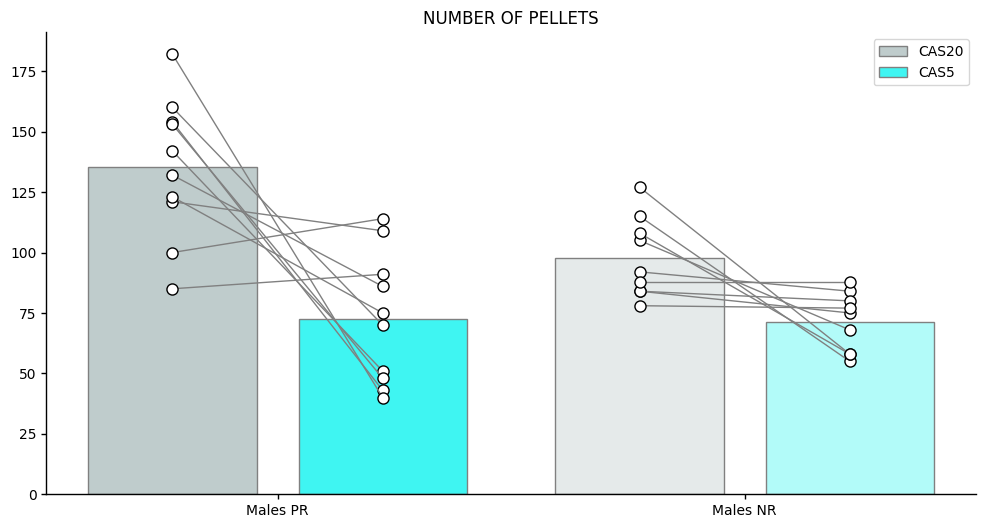

In [57]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["gray"]*4,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("NUMBER OF PELLETS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR']
ax.set_xticks([1,2])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



To calculate the ratio of CAS20 to CAS5 pellets, I followed these steps:

Filter Data: I selected only the data for male mice (SEX = 'M') who were in their first choice session (CHOICE_SESSION = 1) and where the pellet type was either CAS20 or CAS5.

Group and Summarize: I grouped the data by both 'DIET' (NR or PR) and 'PELLET_TYPE' (CAS20 or CAS5), and then summed up the 'COUNT' column for each group. This gave us the total counts of CAS20 and CAS5 pellets consumed by diet.

Calculate Ratio: I divided the total count of CAS20 pellets by the total count of CAS5 pellets for each diet type. This ratio gives us a sense of the preference or consumption pattern between the two pellet types for each diet.

This approach provided a clear numerical comparison of how much more (or less) CAS20 pellets were consumed relative to CAS5 pellets, under each diet condition for the specified group of mice.







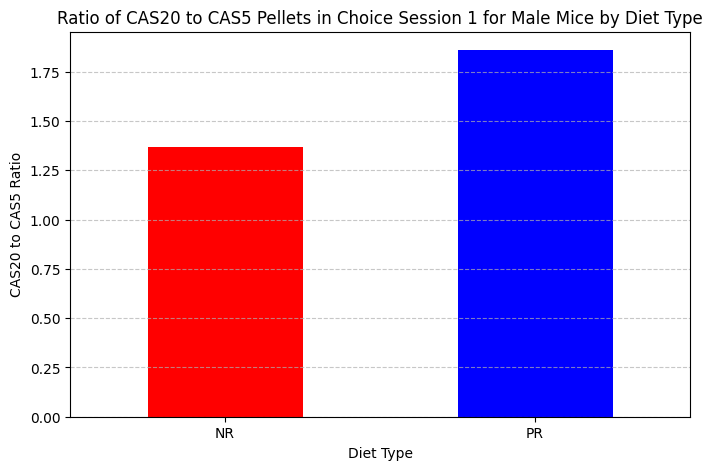

In [70]:
# Filter data for males in Choice Session 1 and focus on CAS20 and CAS5 pellet types
filtered_cas_data = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['PELLET_TYPE'].isin(['CAS20', 'CAS5']))]

# Group by diet and pellet type, then sum the counts
grouped_cas_data = filtered_cas_data.groupby(['DIET', 'PELLET_TYPE'])['COUNT'].sum().unstack()

# Compute the ratio of CAS20 to CAS5 pellets for each diet type
grouped_cas_data['CAS20_to_CAS5_ratio'] = grouped_cas_data['CAS20'] / grouped_cas_data['CAS5']
grouped_cas_data[['CAS20_to_CAS5_ratio']]

# Plotting the ratio of CAS20 to CAS5 pellets for each diet type
plt.figure(figsize=(8, 5))
grouped_cas_data['CAS20_to_CAS5_ratio'].plot(kind='bar', color=['red', 'blue'])
plt.title('Ratio of CAS20 to CAS5 Pellets in Choice Session 1 for Male Mice by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('CAS20 to CAS5 Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 800x500 with 0 Axes>

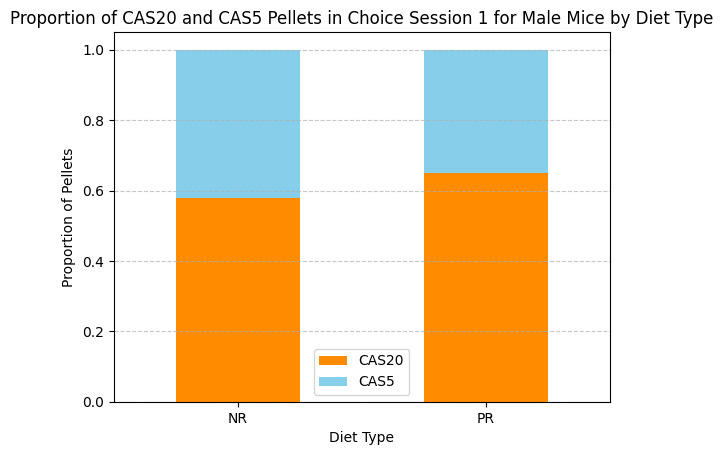

In [71]:
# Calculate the total counts for each pellet type within each diet group for better visualization
grouped_cas_data['Total'] = grouped_cas_data['CAS20'] + grouped_cas_data['CAS5']

# Normalize the counts to get proportions
grouped_cas_data['Proportion_CAS20'] = grouped_cas_data['CAS20'] / grouped_cas_data['Total']
grouped_cas_data['Proportion_CAS5'] = grouped_cas_data['CAS5'] / grouped_cas_data['Total']

# Plotting the proportions
plt.figure(figsize=(8, 5))
grouped_cas_data[['Proportion_CAS20', 'Proportion_CAS5']].plot(kind='bar', stacked=True, color=['darkorange', 'skyblue'])
plt.title('Proportion of CAS20 and CAS5 Pellets in Choice Session 1 for Male Mice by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Proportion of Pellets')
plt.xticks(rotation=0)
plt.legend(['CAS20', 'CAS5'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


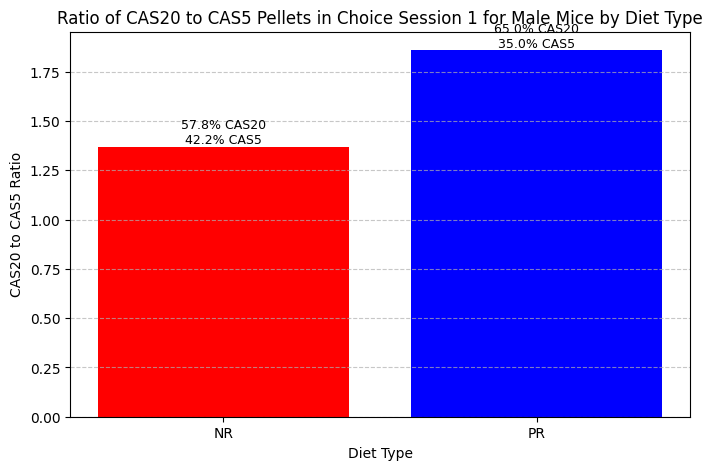

In [73]:
# Replotting with correct annotations using index-based positioning
fig, ax = plt.subplots(figsize=(8, 5))
bar_plot = ax.bar(grouped_cas_data.index, grouped_cas_data['CAS20_to_CAS5_ratio'], color=['red', 'blue'])
plt.title('Ratio of CAS20 to CAS5 Pellets in Choice Session 1 for Male Mice by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('CAS20 to CAS5 Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating each bar with the proportion of CAS20 and CAS5
for rect, (index, row) in zip(bar_plot, grouped_cas_data.iterrows()):
    total = row['Total']
    cas20_count = row['CAS20']
    cas5_count = row['CAS5']
    proportion_cas20 = cas20_count / total * 100
    proportion_cas5 = cas5_count / total * 100
    ax.annotate(f'{proportion_cas20:.1f}% CAS20\n{proportion_cas5:.1f}% CAS5', 
                (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.show()


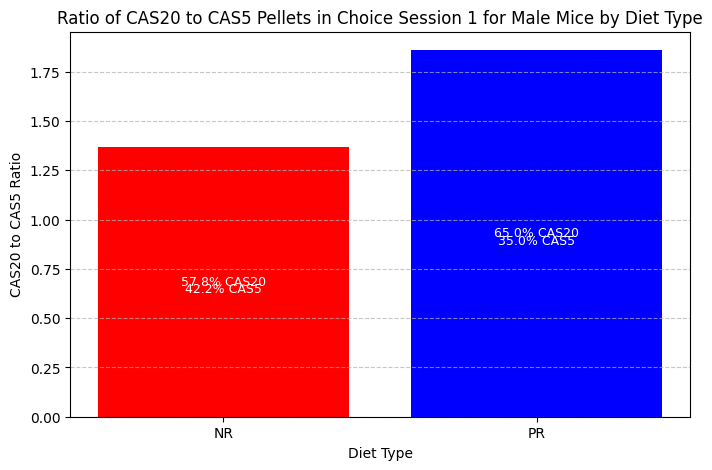

In [75]:
# Replotting with annotations inside the bars
fig, ax = plt.subplots(figsize=(8, 5))
bar_plot = ax.bar(grouped_cas_data.index, grouped_cas_data['CAS20_to_CAS5_ratio'], color=['red', 'blue'])
plt.title('Ratio of CAS20 to CAS5 Pellets in Choice Session 1 for Male Mice by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('CAS20 to CAS5 Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating inside each bar with the proportion of CAS20 and CAS5
for rect, (index, row) in zip(bar_plot, grouped_cas_data.iterrows()):
    total = row['Total']
    cas20_count = row['CAS20']
    cas5_count = row['CAS5']
    proportion_cas20 = cas20_count / total * 100
    proportion_cas5 = cas5_count / total * 100
    y_position = rect.get_height() / 2  # Position the text inside the bar
    ax.text(rect.get_x() + rect.get_width() / 2, y_position, f'{proportion_cas20:.1f}% CAS20', 
            ha='center', va='center', fontsize=9, color='white', rotation=0)
    ax.text(rect.get_x() + rect.get_width() / 2, y_position, f'\n{proportion_cas5:.1f}% CAS5', 
            ha='center', va='center', fontsize=9, color='white', rotation=0)

plt.show()


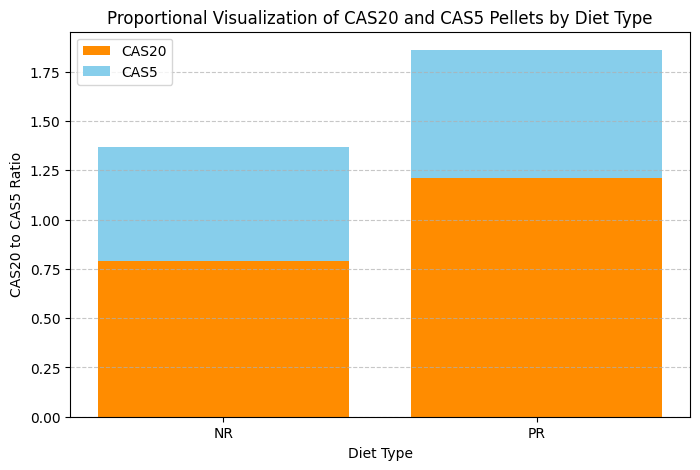

In [76]:
# Replotting with proportional segments in different colors for CAS20 and CAS5
fig, ax = plt.subplots(figsize=(8, 5))
# Calculate bottom position for the CAS5 segment in the stacked bar
bottom_segment = grouped_cas_data['Proportion_CAS5'] * grouped_cas_data['CAS20_to_CAS5_ratio']

# Creating stacked bars
bar_cas20 = ax.bar(grouped_cas_data.index, grouped_cas_data['Proportion_CAS20'] * grouped_cas_data['CAS20_to_CAS5_ratio'],
                   label='CAS20', color='darkorange')
bar_cas5 = ax.bar(grouped_cas_data.index, bottom_segment, label='CAS5', color='skyblue',
                  bottom=grouped_cas_data['Proportion_CAS20'] * grouped_cas_data['CAS20_to_CAS5_ratio'])

plt.title('Proportional Visualization of CAS20 and CAS5 Pellets by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('CAS20 to CAS5 Ratio')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


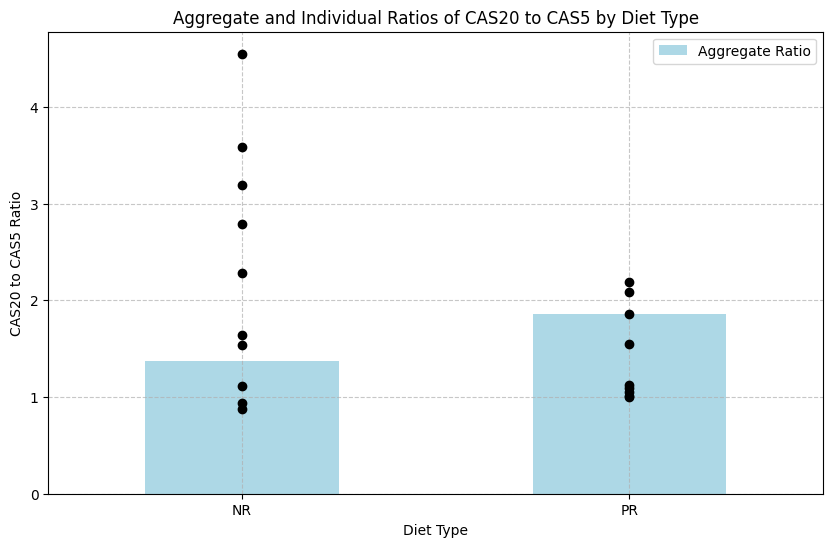

In [77]:


filtered_data = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['PELLET_TYPE'].isin(['CAS20', 'CAS5']))]

# Calculate individual and group ratios
# Group by MOUSEID and DIET to find individual counts
individual_counts = filtered_data.groupby(['MOUSEID', 'DIET', 'PELLET_TYPE'])['COUNT'].sum().unstack().fillna(0)
individual_counts['Ratio'] = individual_counts['CAS20'] / individual_counts['CAS5']

# Aggregate ratios for each diet group
aggregate_ratios = individual_counts.groupby('DIET').apply(lambda x: x['CAS20'].sum() / x['CAS5'].sum())

# Preparing the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Stacked bar plot for aggregate ratios
aggregate_ratios.plot(kind='bar', color='lightblue', ax=ax, label='Aggregate Ratio')

# Overlay individual ratios
for diet in individual_counts.index.get_level_values('DIET').unique():
    # Gathering individual ratios for plotting
    ratios = individual_counts.xs(diet, level='DIET')['Ratio']
    ax.scatter([diet]*len(ratios), ratios, color='black', zorder=5)

plt.title('Aggregate and Individual Ratios of CAS20 to CAS5 by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('CAS20 to CAS5 Ratio')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()

plt.show()




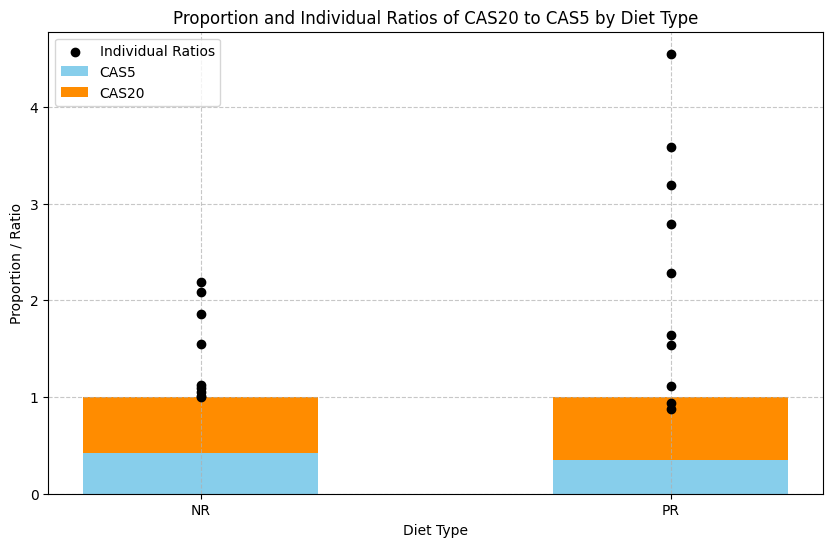

In [79]:
# Calculate proportions for stacked bar chart
grouped_data = filtered_data.groupby(['DIET', 'PELLET_TYPE'])['COUNT'].sum().unstack().fillna(0)
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Proportion_CAS20'] = grouped_data['CAS20'] / grouped_data['Total']
grouped_data['Proportion_CAS5'] = grouped_data['CAS5'] / grouped_data['Total']

# Plotting the corrected stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5

# Stacking CAS5 at the bottom
ax.bar(grouped_data.index, grouped_data['Proportion_CAS5'], color='skyblue', width=bar_width, label='CAS5')
# Stacking CAS20 on top
ax.bar(grouped_data.index, grouped_data['Proportion_CAS20'], bottom=grouped_data['Proportion_CAS5'], 
       color='darkorange', width=bar_width, label='CAS20')

# Overlay individual data points
for diet in individual_counts.index.get_level_values('DIET').unique():
    ratios = individual_counts.xs(diet, level='DIET')['Ratio']
    ax.scatter([diet] * len(ratios), ratios, color='black', zorder=5, label='Individual Ratios' if diet == 'NR' else "")

plt.title('Proportion and Individual Ratios of CAS20 to CAS5 by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Proportion / Ratio')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()

plt.show()



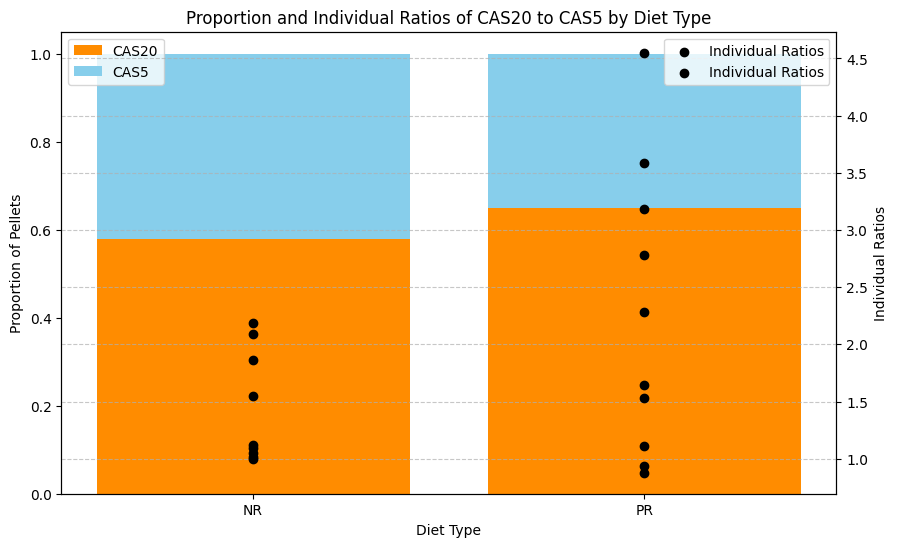

In [80]:
# Calculate total counts for CAS20 and CAS5 and their respective proportions
grouped_totals = filtered_data.groupby(['DIET', 'PELLET_TYPE'])['COUNT'].sum().unstack()
grouped_totals['Total'] = grouped_totals.sum(axis=1)
grouped_totals['Proportion_CAS20'] = grouped_totals['CAS20'] / grouped_totals['Total']
grouped_totals['Proportion_CAS5'] = grouped_totals['CAS5'] / grouped_totals['Total']

# Calculate aggregate ratios for clearer comparison on the same scale
grouped_totals['Aggregate_Ratio'] = grouped_totals['CAS20'] / grouped_totals['CAS5']

# Create a new figure for the corrected visualization
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot proportions as stacked bars
bars1 = ax1.bar(grouped_totals.index, grouped_totals['Proportion_CAS20'], color='darkorange', label='CAS20')
bars2 = ax1.bar(grouped_totals.index, grouped_totals['Proportion_CAS5'], bottom=grouped_totals['Proportion_CAS20'],
                color='skyblue', label='CAS5')

# Create a second y-axis for the ratios
ax2 = ax1.twinx()
ax2.set_ylabel('Individual Ratios')

# Plot individual ratios on the second y-axis
for diet, group in individual_counts.groupby('DIET'):
    ratios = group['Ratio']
    ax2.scatter([diet] * len(ratios), ratios, color='black', label='Individual Ratios', zorder=5)

plt.title('Proportion and Individual Ratios of CAS20 to CAS5 by Diet Type')
ax1.set_xlabel('Diet Type')
ax1.set_ylabel('Proportion of Pellets')
ax1.set_xticks(range(len(grouped_totals.index)), grouped_totals.index)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', alpha=0.7)

plt.show()


/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


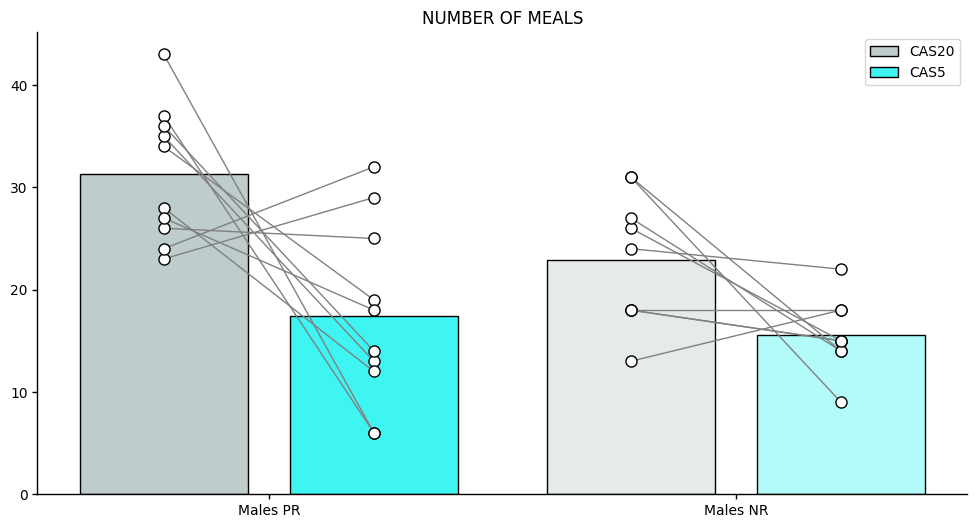

In [50]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("NUMBER OF MEALS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR']
ax.set_xticks([1,2])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


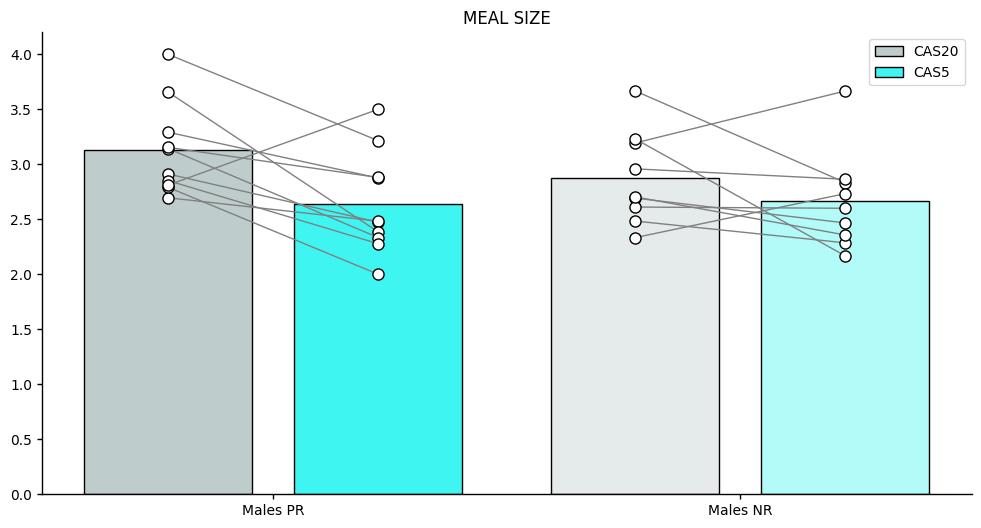

In [67]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("MEAL SIZE")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR']
ax.set_xticks([1,2])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



/home/codespace/.python/current/lib/python3.10/site-packages/trompy/barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


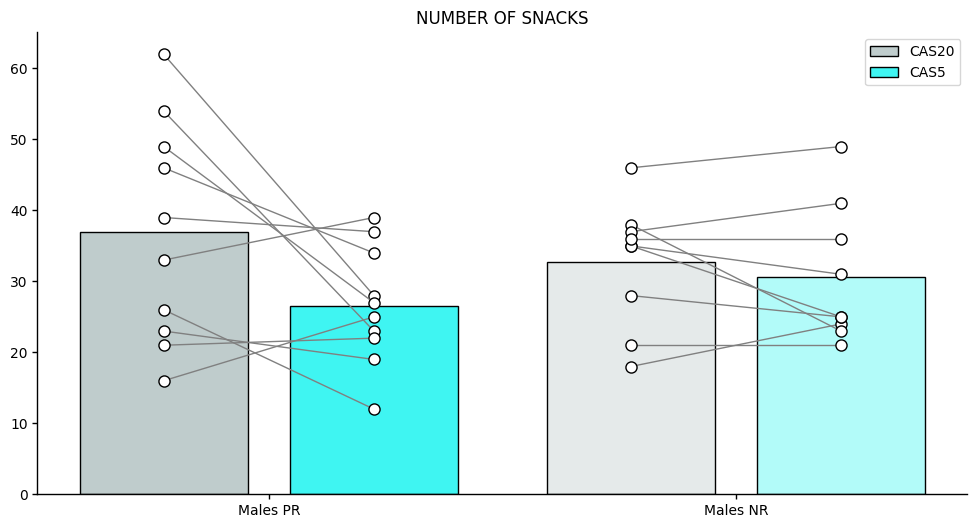

In [49]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("NUMBER OF SNACKS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR']
ax.set_xticks([1,2])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



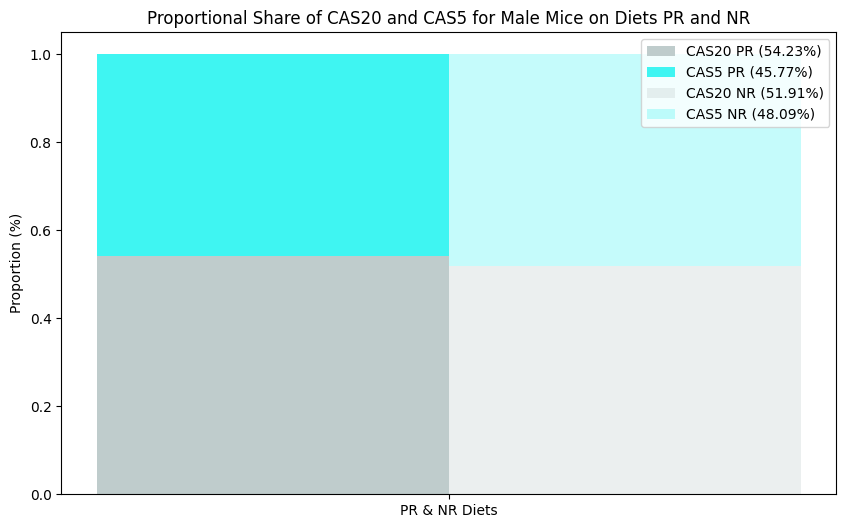

In [64]:

# Filter data for male mice on PR and NR diets, and for pellet types CAS20 and CAS5
filtered_pr = data[(data['SEX'] == 'M') & (data['DIET'] == 'PR') & (data['CHOICE_SESSION'] == 1) & (data['PELLET_TYPE'].isin(['CAS20', 'CAS5']))]
filtered_nr = data[(data['SEX'] == 'M') & (data['DIET'] == 'NR') & (data['CHOICE_SESSION'] == 1) & (data['PELLET_TYPE'].isin(['CAS20', 'CAS5']))]

# Group and sum counts for PR and NR
grouped_pr = filtered_pr.groupby('PELLET_TYPE')['MEAL_SIZE'].sum().reset_index()
grouped_nr = filtered_nr.groupby('PELLET_TYPE')['MEAL_SIZE'].sum().reset_index()

# Calculate proportions for PR and NR
total_pr = grouped_pr['MEAL_SIZE'].sum()
total_nr = grouped_nr['MEAL_SIZE'].sum()
grouped_pr['PROPORTION'] = grouped_pr['MEAL_SIZE'] / total_pr
grouped_nr['PROPORTION'] = grouped_nr['MEAL_SIZE'] / total_nr

# Extract proportions for CAS20 and CAS5 for PR and NR
proportion_cas20_pr = grouped_pr[grouped_pr['PELLET_TYPE'] == 'CAS20']['PROPORTION'].values[0]
proportion_cas5_pr = grouped_pr[grouped_pr['PELLET_TYPE'] == 'CAS5']['PROPORTION'].values[0]
proportion_cas20_nr = grouped_nr[grouped_nr['PELLET_TYPE'] == 'CAS20']['PROPORTION'].values[0]
proportion_cas5_nr = grouped_nr[grouped_nr['PELLET_TYPE'] == 'CAS5']['PROPORTION'].values[0]

# Creating a single figure with shared y-axis for PR and NR diets
fig, ax = plt.subplots(figsize=(10, 6))

# Adjusting the bar widths and re-plotting with narrower bars
bar_width = 0.01  # Narrower bar width
index = [0]  # Single group

# Bar locations for each dataset
bar1 = [i - bar_width/2 for i in index]
bar2 = [i + bar_width/2 for i in index]



cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
cas20_color_NR = (0.749, 0.8, 0.8)
cas5_color_NR = (0.247, 0.961, 0.949)


# Plotting the bars for PR diet with narrower width
ax.bar(bar1, proportion_cas20_pr, width=bar_width, color=cas20_color_PR , label='CAS20 PR ({}%)'.format(round(proportion_cas20_pr * 100, 2)))
ax.bar(bar1, proportion_cas5_pr, width=bar_width, bottom=proportion_cas20_pr, color=cas5_color_PR , label='CAS5 PR ({}%)'.format(round(proportion_cas5_pr * 100, 2)))

# Plotting the bars for NR diet with narrower width
ax.bar(bar2, proportion_cas20_nr, width=bar_width, color=cas20_color_NR , alpha=0.3, label='CAS20 NR ({}%)'.format(round(proportion_cas20_nr * 100, 2)))
ax.bar(bar2, proportion_cas5_nr, width=bar_width, bottom=proportion_cas20_nr, color=cas5_color_NR , alpha=0.3, label='CAS5 NR ({}%)'.format(round(proportion_cas5_nr * 100, 2)))

# Adding labels and title
ax.set_ylabel('Proportion (%)')
ax.set_title('Proportional Share of CAS20 and CAS5 for Male Mice on Diets PR and NR')
ax.set_xticks(index)
ax.set_xticklabels(['PR & NR Diets'])
ax.legend()

plt.show()



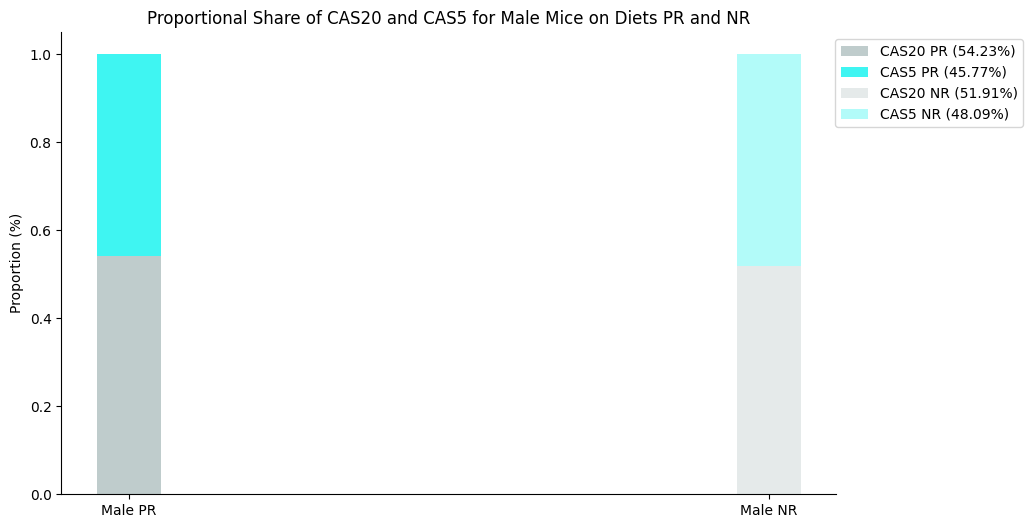

In [69]:

# Figure setup
fig, ax = plt.subplots(figsize=(10, 6))

# Bar widths and positions for PR and NR
bar_width = 0.1
index_pr = [0]  # Position for PR group
index_nr = [1]  # Position for NR group

# Custom colors (optional for better visualization)
cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
cas20_color_NR = (0.749, 0.8, 0.8)
cas5_color_NR = (0.247, 0.961, 0.949)

# Plotting bars for each diet and pellet type
ax.bar(index_pr, proportion_cas20_pr, width=bar_width, color=cas20_color_PR, label='CAS20 PR ({}%)'.format(round(proportion_cas20_pr * 100, 2)))
ax.bar(index_pr, proportion_cas5_pr, width=bar_width, bottom=proportion_cas20_pr, color=cas5_color_PR, label='CAS5 PR ({}%)'.format(round(proportion_cas5_pr * 100, 2)))

ax.bar(index_nr, proportion_cas20_nr, width=bar_width, color=cas20_color_NR, alpha=0.4, label='CAS20 NR ({}%)'.format(round(proportion_cas20_nr * 100, 2)))
ax.bar(index_nr, proportion_cas5_nr, width=bar_width, bottom=proportion_cas20_nr, color=cas5_color_NR, alpha=0.4, label='CAS5 NR ({}%)'.format(round(proportion_cas5_nr * 100, 2)))

# Final plot adjustments
ax.set_ylabel('Proportion (%)')
ax.set_title('Proportional Share of CAS20 and CAS5 for Male Mice on Diets PR and NR')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male PR', 'Male NR'])
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



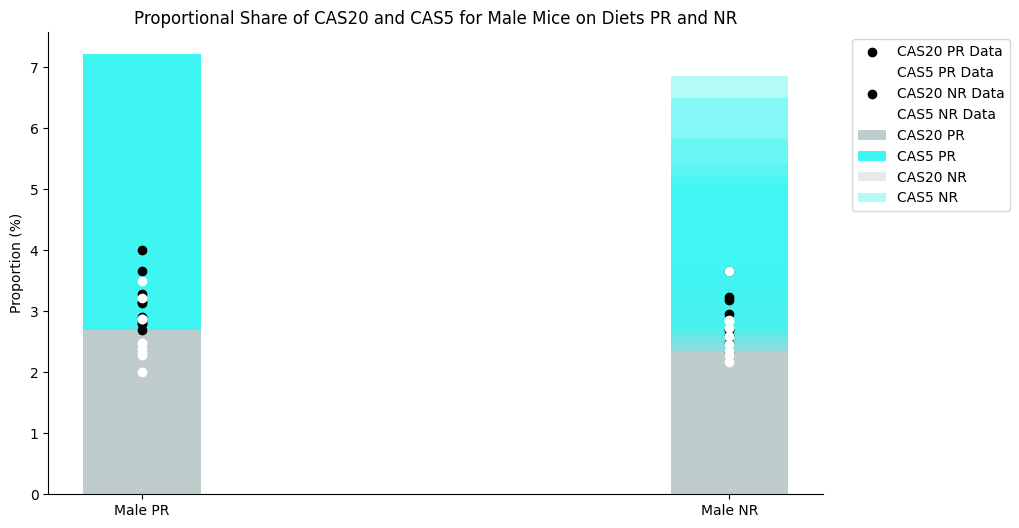

In [68]:
# Figure setup
fig, ax = plt.subplots(figsize=(10, 6))

# Bar widths and positions for PR and NR
bar_width = 0.2
index_pr = [0]  # Position for PR group
index_nr = [1]  # Position for NR group


cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
cas20_color_NR = (0.749, 0.8, 0.8)
cas5_color_NR = (0.247, 0.961, 0.949)


# Plotting bars for each diet and pellet type
bar1 = ax.bar(index_pr, cas20_mpr1, width=bar_width, color=cas20_color_PR, label='CAS20 PR')
bar2 = ax.bar(index_pr, cas5_mpr1, width=bar_width, bottom=cas20_mpr1, color=cas5_color_PR, label='CAS5 PR')

bar3 = ax.bar(index_nr, cas20_mnr1, width=bar_width, color=cas20_color_NR, label='CAS20 NR', alpha=0.4)
bar4 = ax.bar(index_nr, cas5_mnr1, width=bar_width, bottom=cas20_mnr1, color=cas5_color_NR, label='CAS5 NR', alpha=0.4)

# Adding individual data points
ax.scatter([0] * len(cas20_mpr1), cas20_mpr1, color="black", label='CAS20 PR Data')
ax.scatter([0] * len(cas5_mpr1), cas5_mpr1, color="white", label='CAS5 PR Data')

ax.scatter([1] * len(cas20_mnr1), cas20_mnr1, color="black", label='CAS20 NR Data')
ax.scatter([1] * len(cas5_mnr1), cas5_mnr1, color="white", label='CAS5 NR Data')

# Final plot adjustments
ax.set_ylabel('Proportion (%)')
ax.set_title('Proportional Share of CAS20 and CAS5 for Male Mice on Diets PR and NR')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male PR', 'Male NR'])
ax.legend()
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

